# DSCI 6003 2.3 Lecture

## The curse of dimensionality 

The curse of dimensionality is a phrase that refers to a group of observational phenomena that occur when dealing with data of dimensionality greater than 3, i.e. vectors/matrices/tensors of length greater than three. It should be obvious that most real world data fits this description if we are to consider it in matrix format.

As the number of dimensions increases, the [metric space](https://en.wikipedia.org/wiki/Metric_space) or distance relationships between points of data in the data set, becomes deformed. This leads to the following phenomena:

1. Points separate into extrema. Points become either extremely close together or extremely far apart. Nearest points are often extremely far away, so that any differences between the distances tend towards being smaller.
2. Geometric intuition breaks down. As a consequence of (1.), geometric intuition about algorithms breaks down. It becomes more difficult to interpret comparative values of cost function and thus harder to understand why the algorithm fails.
3. The computational cost of managing long data vectors increases relative to their length. (This can become a significant performance penalty when algorithms need to loop over the length of the vector.)
4. Exponential sampling increase. As d gets large, the number of vectors that are almost orthogonal increases rapidly. This causes sampling to become inefficient, as the number of data points required to adequately describe the sample space increases exponentially!

The curse of dimensionality is well studied. Additional reading may be found in the included notes.



## Intuiting the Curse: Volume in Hyperspace

Following the laws of probability, consider the complete outcome space $S$ for our system as being describable as a geometric object. If we think of the sampling process as random (uniform or normal) selection of points within the geometric object, this gives us some idea of the relationship of probability-sample and geometric relationships. Samples that land close to the center have distance relationships that are clear. As samples get closer to the edge, the points become constrained in one dimension (like a flattening effect.). This reduces one's ability to understand the complete sample space, as the samples land on the margin.

Consider a square with sides of length $l$. We wish to compute volume occupied by a small margin as shown in the following figure:

<img src="imgs/square_margin.png" width=250/>

In two dimensions, the fraction of the square's volume found within the margin is:

$$V_M = l^2 - (0.9 l)^2 = l^2 (1 - 0.9^2) = 0.19 l^2$$

In three dimensions the fraction of the cube's volume within the margin is:

$$V_M = l^3 - (0.9 l)^3 = l^3 (1 - 0.9^3)= 0.27 l^3$$

For the general case, as the dimensionality $d$ increases, the volume of the margine becomes:

$$V_M = l^d (1 - 0.9^d) \approx l^d$$


##  QUIZ:

When d=50, how much of the volume is stored in the margin? Answer: 99% Almost everything is a marginal sample.


Many basic machine learning algorithms are based upon the same ideas that guide kNN: maintain a database of points $S$ you know how to solve, and when presented with a new datapoint x, use the solution/answer for the point in $S$ that is closest to to x. Due to the fact that the volume of the sample space is compressed to the edges as d increases, you need more than $e^d$ points in $S$ before a random point x is guaranteed to have a reasonably nearby point (thus describing a minimal K=1 neighborhood). 



## Analysis of the effect of Dimensionality on Marginal Volume of a Hypercube

In [2]:
def hyperMarginRatio(d = 1, marginRatio = .1, edgeLen = 1):
    TotVolume = edgeLen**d

    HoleLen = edgeLen*(1-marginRatio)
    HoleVolume = HoleLen**d

    marginRatio = (TotVolume - HoleVolume)/TotVolume

    print ("When dimension = " + str(d) + " and the margins are " + str(marginRatio*100) + "% of the total edge length:")
    print ("   Total volume = " + str(TotVolume))
    print ("   Hole volume = " + str(HoleVolume))
    print ("   So as a ratio,")
    print (str(100*marginRatio) + "% of the volume is in the margins.")
    print("")
    return marginRatio

In [8]:
d2 = hyperMarginRatio(d = 100)

When dimension = 100 and the margins are 99.99734386011124% of the total edge length:
   Total volume = 1
   Hole volume = 2.6561398887587544e-05
   So as a ratio,
99.99734386011124% of the volume is in the margins.



In [14]:
maxD = 50
marginRatio = .05


marginRatios = []
X = range(1,maxD+1, 10)

for d in X:
    appenders = round(hyperMarginRatio(d, marginRatio = marginRatio), 2)
    marginRatios.append(appenders)

When dimension = 1 and the margins are 5.0% of the total edge length:
   Total volume = 1
   Hole volume = 0.95
   So as a ratio,
5.0% of the volume is in the margins.

When dimension = 11 and the margins are 43.1199907724% of the total edge length:
   Total volume = 1
   Hole volume = 0.568800092276
   So as a ratio,
43.1199907724% of the volume is in the margins.

When dimension = 21 and the margins are 65.9438373712% of the total edge length:
   Total volume = 1
   Hole volume = 0.340561626288
   So as a ratio,
65.9438373712% of the volume is in the margins.

When dimension = 31 and the margins are 79.6093174254% of the total edge length:
   Total volume = 1
   Hole volume = 0.203906825746
   So as a ratio,
79.6093174254% of the volume is in the margins.

When dimension = 41 and the margins are 87.7913451263% of the total edge length:
   Total volume = 1
   Hole volume = 0.122086548737
   So as a ratio,
87.7913451263% of the volume is in the margins.



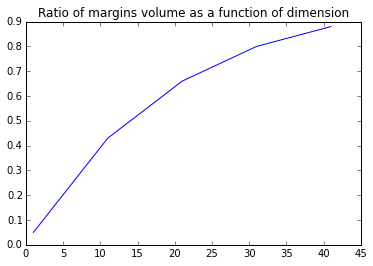

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, marginRatios)
plt.title('Ratio of margins volume as a function of dimension')

## The effect of Dimensionality on Distance in Hyperspace

Another practical effect of high dimensionality is that the distance between nearest neighbours becomes very large. One way to observe this effect is through a simple simulation. 

Suppose we generate a set of random vectors $\bf{x}$ in $\mathbb{R}^d$ where each component $x_i$ is uniformally distributed between $-1$ and $1$, i.e., $x_i \sim U(-1,1)$.

The following figure displays a set of these vectors in $\mathbb{R}^3$:

<img src="imgs/uniform_points_cube.gif" width=300/>

Measuring the distance, $r$, of each point from the origin, and binning this into a histogram, we can see that the random points have a distribution capable of reaching the origin. As the dimensionality increases, the value of the smallest distance increases (why?). In other words, the closest point to the origin can be very far away. The following histograms illustrate this effect:

<img src="imgs/distance_50d_hist.gif" width=400/>
<img src="imgs/distance_100d_hist.gif" width=400/>
<img src="imgs/distance_100000d_hist.gif" width=400/>

## The effect of Dimensionality on Required Sampling Density

As the dimensionality $d$ increases, the volume of the space increases so fast that the available data becomes sparse. Consider $N$ uniformaly distributed data points  in $d$ dimensional space. If we construct a hypercube by capturing an $r$ fraction of the total sample range of each feature, then number of points captured by this hypercube is given by:

$$n = N r^d$$

The following simulation illustrates this effect. In this simulation $1000$ points are generated and we're considering $20\%$ of the range of each feature. The small rectangle in $2d$ captures $3.1\%$ of the data points whereas the cube in $3d$ captures only $0.5\%$ of total data points.

<img src="imgs/sparcity_2d.png" width=300/>
<img src="imgs/sparcity_3d.png" width=300/>

# Addressing the Curse of Dimensionality: Feature Engineering

To address the Curse, we need to lower the dimensionality of the metric space ($S$) in $\mathbb{R}^n$ while maintaining the ordering within the metric space. This means that if we have a set of points $\bf{x} \in X$ in  we need to find corresponding set of points $\bf{u}$ in a new metric space $U$ over the field $\mathbb{R}^m$, such that $m < n$ and the metric space is almost preserved by some finite margin of error:

$$\|x_{i}-x_{j}\|_2 \leq \|u_{i}-u_{j}\|_2 \leq (1+\epsilon)\|x_{i}-x_{j}\|_2$$

This process, applied professionally, is called **Feature engineering** and is the topic of approximately 50% of this class. Feature engineering today is largely a guess-and-check process where the ostensible engineer attempts to generate the mapping to the new metric space through methods meant to model the underlying meaning, thus making the mapping $S \rightarrow U$. Oftentimes the quality of the feature engineering is only known after the fact. This has spurred numerous attempts at **automated feature engineering**, with mixed results. 


## Feature Engineering by Reduction:

A standard data vector in dimension $d$ is represented as a vector, i.e.:

$${\bf x} = x_1 {\bf e}_1 + x_2 {\bf e}_2 + \cdots + x_d {\bf e}_d = \sum_{i=1}^{d} x_i {\bf e}_i$$

where ${\bf e}_i$ are orthonormal basis vectors:

$${\bf e}_i^T {\bf e}_j = 1 ~~~~~~~ \text{if} ~~ i = j$$
$$~~~~~~~ = 0 ~~~~~~~ \text{if} ~~ i \ne j$$

Thus the data points reside in a $d$-dimensional *feature space*. We can represent the data set in terms of a $n\times d$ matrix where $n$ is the number of data points (or samples).

$${\bf D} = \begin{bmatrix} {\bf x}_1^T \\ \vdots \\ {\bf x}_n^T \end{bmatrix}$$


Each point ${\bf x}_i^T = [x_{i1} ~~ x_{i2} ~~ \cdots ~~ x_{id}]$ is a vector in $d$-dimensional vector space.

<img src="imgs/iris_data_standard_space.png" width=200 />
$$\text{Iris data in standard feature space.}$$

Given a set of $d$ orthonormal basis vectors, $U$, such that ${\bf u}_i$ are orthonormal basis vectors that span $\mathbb{R}^d$, we can express ${\bf x}$ as

$${\bf x} = \sum_{i=1}^{d} a_i {\bf u}_i$$

Such that

$${\bf u}_i^T {\bf u}_j = 1 ~~~~~~~ \text{if} ~~ i = j$$
$$~~~~~~~~ = 0 ~~~~~~~ \text{if} ~~ i \ne j$$

<img src="imgs/iris_data_rotated_space.png" width=220 />
$$\text{Iris data in rotated space.}$$

The transformed data matrix can be expressed as:

$${\bf A} = \begin{bmatrix} {\bf a}_1^T \\ \vdots \\ {\bf a}_n^T \end{bmatrix}$$

The new representation for each data point is obtained through a linear transformation ${\bf a}_i = {\bf U}^T {\bf x}_i$, where $\bf U$ is the matrix formed by orthonormal basis vectors: ${\bf U} = [{\bf u}_1 ~~ \cdots ~~ {\bf u}_d]$. As there are infinite possible choices for the set of orthonormal basis vectors, one natural question is whether there exists an optimal basis for expressing the data set in terms of fewer vectors. 

This is a natural application for Principal Component Analysis, and we shall review it here.


## Principal Component Analysis

<img src="imgs/PCA.jpeg" width=250/>


### Quiz When is PCA going to work?

https://en.wikipedia.org/wiki/Principal_component_analysis

Have a look at the relationship between correlation and the covariance of two variables.  https://en.wikipedia.org/wiki/Correlation_and_dependence .  In what circumstance is PCA going to be the most helpful?  


## Implementing PCA

### Mean and Variance

The mean of the data matrix is the vector obtained as the average of all the points:

$$mean({\bf D}) = {\bf \mu} = \frac{1}{n} \sum_{i=1}^n {\bf x}_i$$

Thus the $i$th component of the mean vector ${\bf \mu}$ is the average of the values of $i$th column of ${\bf D}$. That is

$${\bf \mu} = [\mu_1~~\mu_2~~\cdots~~\mu_d]^T$$

such that

$$\mu_j = \frac{1}{n} \sum_{i=1}^n x_{ij} ~~~~~~\text{for each }j=1,2,\cdots,d$$

The _total variance_ of the data matrix is the average squared distance of each point from the mean:

$$var({\bf D}) = \frac{1}{n} \sum_{i=1}^n \| {\bf x}_i - {\bf \mu} \|^2$$
$$var({\bf D}) = \frac{1}{n} \sum_{i=1}^n \left \{ (x_{i1} - \mu_1)^2 + (x_{i2} - \mu_2)^2 + \cdots + (x_{id} - \mu_d)^2 \right\}$$

Thus the total variance is the sum of variances of the columns of ${\bf D}$. This can also be expressed as

$$var({\bf D}) = \frac{1}{n} \left( \sum_{i=1}^n \| {\bf x}_i \|^2 \right ) - \| \mu \|^2$$

Thus the total variance is the difference between the average of the squared magnitude of the data points and the squared magnitude of the mean.



### Mean-deviation Form

In many applications we need to _center the data matrix_ by subtracting the mean from all the data points:

$${\bf \hat{x}}_i = {\bf x}_i - {\bf \mu}$$

This gives us a new data matrix 

$${\bf Z} = \left[ \begin{matrix} {\bf \hat{x}}_1^T \\ \vdots \\ {\bf \hat{x}}_n^T \end{matrix} \right] = \left[ \begin{matrix} ({\bf x}_1 - {\bf \mu})^T \\ \vdots \\ ({\bf x}_n - {\bf \mu})^T \end{matrix} \right] = \left[ \begin{matrix} x_{11} - \mu_1 & \cdots & x_{1d} - \mu_d \\ \vdots & \ddots & \vdots \\ x_{n1} - \mu_1 & \cdots & x_{nd} - \mu_d \end{matrix} \right]$$

$\bf Z$ is called _centered data matrix_ for _mean-deviation form_, because $mean({\bf Z}) = {\bf 0}$, that is the mean coincides with the origin of the data space.

### Covariance Matrix

The covariance matrix is a $d \times d$ symmetric matrix that gives the covariance for each pair of attributes

$${\bf \Sigma} = \left[ \begin{matrix} \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1d} \\ \sigma_{21} & \sigma_2^2 & \cdots & \sigma_{2d} \\ \vdots & \vdots & \ddots & \vdots \\ \sigma_{d1}^2 & \sigma_{d2} & \cdots & \sigma_d^2 \end{matrix} \right]$$

The diagonal elements $\sigma_j^2$ specity the variance of $j$th attribute or column of $\bf D$, whereas the off-diagonal elements $\sigma_{jk} = \sigma_{kj}$ represent the covariance between pairs of columns.

$$\sigma_j^2 = \frac{1}{n} \sum_{i=1}^n (x_{ij} - \mu_j)^2$$

$$\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n (x_{ij} - \mu_j)(x_{ik} - \mu_k)$$

If we represent columns of $\bf Z$ with $n$-dimensional vector ${\bf z}_j$:

$${\bf z}_j = \left[ \begin{matrix} x_{1j} - \mu_j \\ \vdots \\ x_{nj} - \mu_j \end{matrix} \right]$$

then we can write variances in a compact form:

$$\sigma_j^2 = \frac{1}{n} {\bf z}_j^T {\bf z}_j~~~~~\text{and}~~~~~\sigma_{jk} = \frac{1}{n} {\bf z}_j^T {\bf z}_k$$

The covariance matrix can be written in a compact form using the centered data matrix as

$${\bf \Sigma} = \frac{1}{n} {\bf Z}^T {\bf Z}$$

This is often called the *scatter matrix*.

The covariance matrix can also be written as a sum of rank-one matrices obtained as the outer product of each centered point:

$${\bf \Sigma} = \frac{1}{n} \left[ \begin{matrix} {\bf \hat{x}}_1 & \cdots & {\bf \hat{x}}_n \end{matrix} \right]  \left[ \begin{matrix} {\bf \hat{x}}_1^T \\ \vdots \\ {\bf \hat{x}}_n^T \end{matrix} \right] = \frac{1}{n} \sum_{i=1}^n {\bf \hat{x}}_i {\bf \hat{x}}_i^T$$